# Python Fundamentals: Introduction to Pandas

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Load .csv files into a Pandas `DataFrame`.
* Understand that Pandas can be used for exploratory analysis.
* Learn how to select columns and rows in a Pandas `DataFrame`.
</div>


### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive exercise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
📝 **Poll:** A Zoom poll to help you learn!<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br>

### Sections
1. [Data Frames: Spreadsheets in Python](#df)
2. [Selecting Columns](#columns)
3. [Selecting Rows](#rows)
4. [Demo: Grouping and Plotting Data Frames](#group)

<a id='df'></a>

# Data Frames: Spreadsheets in Python

**Tabular data** is everywhere. Think of an Excel sheet: each column corresponds to a different feature of each datapoint, while rows correspond to different samples.

In scientific programming, tabular data is often called a **data frame**. In Python, the `pandas` package contains an object called `DataFrame` that implements this data structure.

## Importing Packages

A **package** is a collection of code that someone else wrote and put in a sharable format. Usually it's designed to add specific functionalities to Python. The package we will use in this notebook is called Pandas.

Before we can use a package like Pandas, we have to **import** it into the current session.
Importing is done with the `import` keyword. We simply run `import [PACKAGE_NAME]`, and everything inside the package becomes available to use.

For many packages, like `pandas`, we use an **alias**, or nickname, when importing them. This is just done to save some typing when we refer to the package in our code.

Let's import the `pandas` module, and add the alias `pd`.

In [1]:
import pandas as pd
  # we save it as pd so we can type less later on in our code!
    
# if I run ! pip freeze --- it will spit out all of the libraries in our jupyter notebook

## 🥊 Challenge 1: From Dictionary to Data Frame

You can easily build a data frame from a dictionary. However, the following code gives an error. Why does it have an error? 

💡 **Tip:** Google the line at the bottom of the error message if you need help!

In [3]:
country = ['Afghanistan', 'Greece'] # this line does not have three elements and it needs that to make a full matrix!
continent = ['Asia', 'Europe', 'Africa']
life_exp = [28, 76, 46]

country_dict = {
    'fruit': country,
    'length': continent,
    'color': life_exp}

pd.DataFrame(country_dict)

ValueError: All arrays must be of the same length

## Our Data

For the rest of this workshop we will work with a dataset from [Gapminder](https://en.wikipedia.org/wiki/Gapminder_Foundation). The dataset contains data for 142 countries, with values for life expectancy, GDP per capita, and population, every five years, from 1952 to 2007.

## Reading CSV Files

In the cell below, we use the `read_csv()` method, which takes a string as its main argument. This string consists of the file path pointing to the file.

* `../` means "go up one level from where this notebook is" -- which is the "lessons" folder.
* `data/` means 'go into a folder called "data".
* `gapminder.csv` is the file name we are accessing within that "data" folder.

<img src="../img/filetree.png" alt="Navigating File Tree" width="500"/>

In [4]:
df = pd.read_csv('../data/gapminder.csv')
  # .. means go back to main folder

The `.head()` method will show the first five rows of a Data Frame by default. 

💡 **Tip**: Put an integer in between the parentheses to specify a different number of rows. 

In [6]:
df.head(10)
  # default is 5

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


### More on .csv Files
As data scientists, we'll often be working with these **Comma Seperated Values (.csv)** files. 

Comma separated values files are common because they are relatively small and look good in spreadsheet software. A comma separated values file is just a text file that contains data but that has commas (or other separators) to indicate column breaks.

As you see, `pandas` comes with a function [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
that makes it really easy to import .csv files.

Let's have a look at our .csv file in our browser!

<a id='columns'></a>

# Selecting Columns
Now that we have our `DataFrame`, we can select a single column by selecting the name of that column. This uses bracket notation (like we do when accessing lists).

Check it out:

In [7]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

The data type of this column is a `Series`. It's like a list. You can index a `Series` object just like you can with a list!

In [12]:
gap_country = df['country']
gap_country[0]

df['country'][0] # this also works

'Afghanistan'

## Using Methods on Columns

`DataFrame` objects come with their own methods, many of which operate on a single column of the DataFrame. 

For example, we can identify the number of unique values in each column by using the `nunique()` method:

In [17]:
df["year"].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [19]:
df['year'].nunique()
# df[year].nunique()
  # does not work without quotes. column names need quotes.

NameError: name 'year' is not defined

Usually, a package provides **documentation** that explains all of its functionalities. Let's have a look at the documentation for a method called `value_counts()` [online](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). 

🔔 **Question**: What does `value_counts()` do in the code below?

In [14]:
df['year'].value_counts()
  # the number of values per year
  # works like group_by and summarize lines in R

1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: year, dtype: int64

## 🥊 Challenge 2: Putting Methods in Order

In the following code we want to to find the top-3 most frequently occurring continents in our data. Put the following code fragments in the right order to get this information!

In [20]:
df['continent'].value_counts().head(3)

Africa    624
Asia      396
Europe    360
Name: continent, dtype: int64

📝 **Poll PyFun 3-1:** What is the correct order of the methods?

## Attributes 

Packages like Pandas don't only come with methods, but also with so-called **attributes**.

Attributes are like variables: they give you more information about the data that you have. Methods are like functions: they allow you to do something with data.

For instance, we can easily check the column names of our data frame using the `columns` **attribute**.

In [21]:
df.columns
  # this uses the columns attribute to pull up column names

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

🔔 **Question**: Here's another popular attribute: `shape`. What do you think it does?

In [22]:
df.shape
  # dimensions! (rows, columns)
    
# df.shape(0) is number of rows
# df.shape(1) is number of columns


# we are using pandas rn but numpy (?) is best for 3d data frames

(1704, 6)

## Jupyter Autocomplete

Jupyter Notebooks allow for tab completion, just like many text editors. If you begin typing the name of something (such as a variable) that already exists, you can simply hit **Tab** and Jupyter will autocomplete it for you. If there is more than one possibility, it will show them to you and you can choose from there. 

🔔 **Question:** Below we are selecting a column in our `DataFrame`. See what happens when you hit `TAB`! What are you seeing?

In [23]:
# YOUR CODE HERE

df['continent'].

<bound method Series.isna of 0         Asia
1         Asia
2         Asia
3         Asia
4         Asia
         ...  
1699    Africa
1700    Africa
1701    Africa
1702    Africa
1703    Africa
Name: continent, Length: 1704, dtype: object>

<a id='rows'></a>

# Selecting Rows

What if we wanted to get some rows in our dataset based on some condition? For example, what if we just wanted a select only the rows for which the country is Egypt? Or only rows from a particular year?

We can use so-called **value comparison operators** for this. For instance, to get only the rows that include data points from Egypt, we can use `==`.

In [27]:
df['country'] == "Egypt"

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: country, Length: 1704, dtype: bool

💡 **Tip**: Fancy terminology alert: the above Series is called a **Boolean mask**. It's like a list of True/False labels that we can use to filter our Data Frame for a certain condition! We'll cover this further in Python Intermediate.

Here, we create a subset of our Data Frame with the fancy Boolean mask we just created. 

In [28]:
# Getting only the data points from Egypt
df[df['country'] == 'Egypt']

,country,year,pop,continent,lifeExp,gdpPercap
456,Egypt,1952,22223309.0,Africa,41.893,1418.822445
457,Egypt,1957,25009741.0,Africa,44.444,1458.915272
458,Egypt,1962,28173309.0,Africa,46.992,1693.335853
459,Egypt,1967,31681188.0,Africa,49.293,1814.880728
460,Egypt,1972,34807417.0,Africa,51.137,2024.008147
461,Egypt,1977,38783863.0,Africa,53.319,2785.493582
462,Egypt,1982,45681811.0,Africa,56.006,3503.729636
463,Egypt,1987,52799062.0,Africa,59.797,3885.460710
464,Egypt,1992,59402198.0,Africa,63.674,3794.755195
465,Egypt,1997,66134291.0,Africa,67.217,4173.181797


Note that the output of this operation is a **new data frame**! We can assign it to a new variable so we can work with this subsetted data frame. Let's do it again:

In [31]:
# Creating a new data frame with data from 2002
year_2002_df = df[df['year'] == 2002]
year_2002_df.head()

,country,year,pop,continent,lifeExp,gdpPercap
10,Afghanistan,2002,25268405.0,Asia,42.129,726.734055
22,Albania,2002,3508512.0,Europe,75.651,4604.211737
34,Algeria,2002,31287142.0,Africa,70.994,5288.040382
46,Angola,2002,10866106.0,Africa,41.003,2773.287312
58,Argentina,2002,38331121.0,Americas,74.340,8797.640716


## 🥊 Challenge 3: Subsetting Data Frames

Besides `==` we can use [other operators](https://www.w3schools.com/python/gloss_python_comparison_operators.asp) to compare values. For instance:
- `<` less than
- `>` greater than

Fill in the code below to subset our data frame to include only people with a life expectancy (`lifeExp`) less than 50.

In [39]:
df.shape

year_lifeshort = df[df["lifeExp"] <50]
print(df.shape)

(1704, 6)


In [37]:
year_lifeshort
year_lifeshort.shape

(491, 6)

📝 **Poll PyFun 3-2:** What is the shape of the resulting data frame?

## 🥊 Challenge 4: Subsetting and Calculating the Mean

Let's make use of subsetting to do some calculation! Calculate the **mean life expectancy** for a continent of your choice. 

This means you will have to:
1. Subset the `continent` column using a Boolean mask.
2. Take the `lifeExp` column from that subset.
3. Apply a Pandas method to get the mean from that column.

You might not know how to get the mean of a column – yet! If that's the case, **use your search engine**.

1. Enter the name of the computer language or package, and your question (for instance: "Pandas calculate mean").
2. Read and compare the results you find.
3. Try 'em out!

In [48]:
# YOUR CODE HERE

df[df["continent"] == "Asia"]["lifeExp"].mean()

df[df["continent"] == "Asia"]["lifeExp"].describe()

count    396.000000
mean      60.064903
std       11.864532
min       28.801000
25%       51.426250
50%       61.791500
75%       69.505250
max       82.603000
Name: lifeExp, dtype: float64

📝 **Poll PyFun 3-3:** After these 3 workshops, how comfortable do you feel advancing to a workshop about Pandas DataFrames?

<a id='group'></a>

# 🎬 Demo: Grouping and Plotting Data Frames

There is a lot more you can do in Pandas. Take your learning further with D-Lab's [**Python Intermediate**](https://github.com/dlab-berkeley/Python-Intermediate-Pilot) or [**Python Data Wrangling**](https://github.com/dlab-berkeley/Python-Data-Wrangling) workshops. 

[Register now](https://dlab.berkeley.edu/training/upcoming-workshops) to learn more skills in Pandas, such as `groupby()`: a powerful operation that allows you to split data into groups based on some criteria. 

Here's a small demo of what you'll learn:

<Axes: xlabel='continent'>

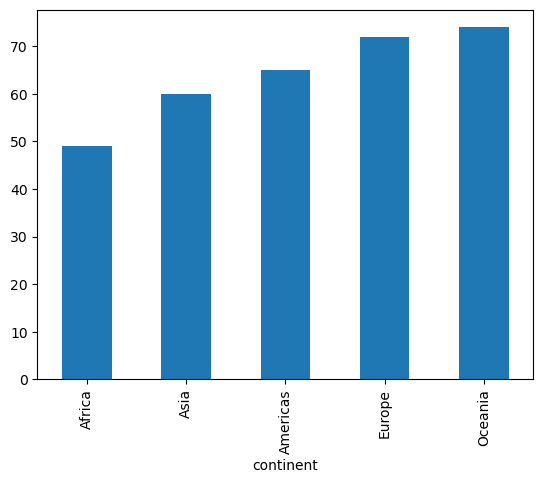

In [53]:
round(df.groupby('continent')['lifeExp'].mean().sort_values()).plot(kind = "bar")

AttributeError: 'Series' object has no attribute 'bar'

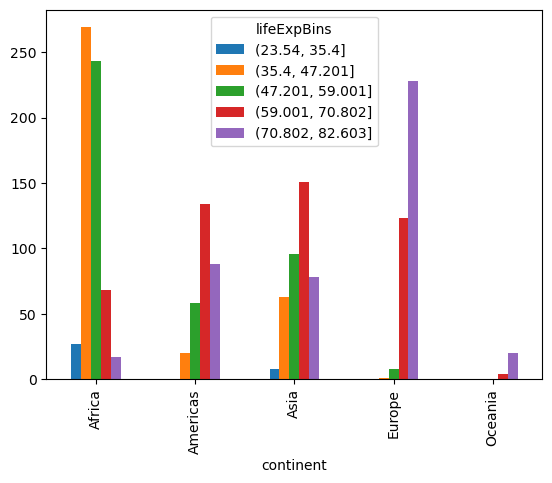

In [54]:
import matplotlib.pyplot as plt

# Create new column with life expectancy sorted into 5 bins
df['lifeExpBins'] = pd.cut(df['lifeExp'], 5)
  # sorting into 5 bins
  # into fifths based on total distribution?

# Group by continent, get the "gdpPercap" column. 
# Learn more in D-Lab's Data Wrangling workshop!
df_grouped = df.groupby('continent')['lifeExpBins'].value_counts()
  # groupsby continent

# Pivot the table and put it in a new DataFrame
ag = df_grouped.unstack()
  # what does unstack do?
    
# print(df_grouped)
# print(ag)

# Plot barchart. Learn more in D-Lab's Data Visualization workshop!
ag.plot.bar();
# df_grouped.bar();
  # this doesn't work

# 🎉 Well Done!

This workshop series took us through the basics of data analysis in Python:

- Using Jupyter notebooks
- Variables, data types, functions
- Looking through documentation
- Googling errors and debugging
- Manipulating data with Pandas


## More Workshops!

D-Lab teaches workshops that allow you to practice more with DataFrames and visualization.

- To continue your learning in Python, check out D-Lab's [Python Intermediate workshop](https://github.com/dlab-berkeley/Python-Intermediate-Pilot).
- To learn more about data wrangling, check out D-Lab's [Python Data Wrangling workshop](https://github.com/dlab-berkeley/Python-Data-Wrangling).
- To learn more about data visualization, check out D-Lab's [Python Data Visualization workshop](https://github.com/dlab-berkeley/Python-Data-Visualization).

<div class="alert alert-success">

## ❗ Key Points

* Import a library into Python using `import <libraryname>`.
* Data frames allow you to work with tabular data (think Excel in Python).
* A .csv file is just a text file that contains data separated by commas.
* Use the `pandas` library to work with data frames.
* Data frames are typically assigned as `df`.
* `DataFrame` columns can be indexed using square brackets - e.g. `df[last_name]` indexes a column called "last_name" in `df`.
* Use the `.describe()` method on a `DataFrame` to get basic summary statistics.
    
</div>